In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [25]:
bostonDF.shape

(506, 14)

In [26]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


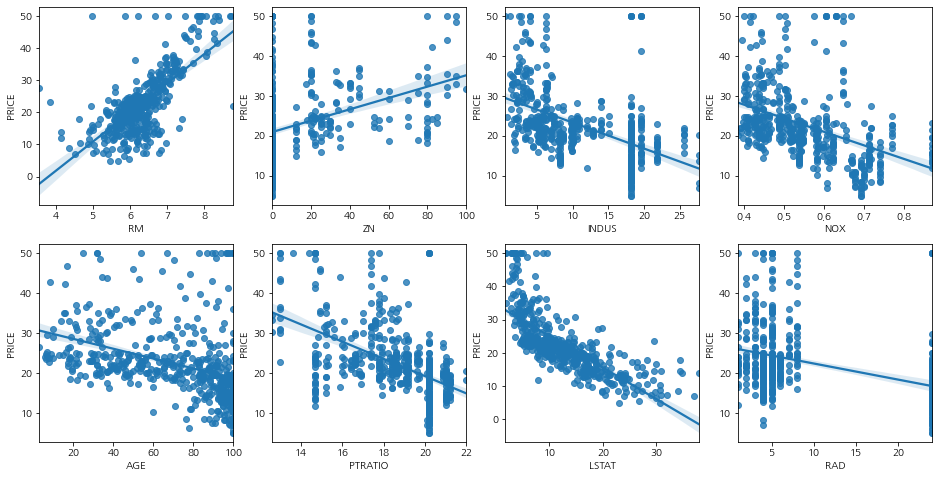

In [27]:
# 2행 4열 subplots, axs는 4X2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4) # 0,1,2,3 은 0으로 나와서 첫줄 4,5,6,7 은 1 이상이므로 둘쨰줄
    col = i%4
    
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함꼐 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

## LinearRegression이용 회귀 모델

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [30]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))
print('Variance score : {:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [31]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [32]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [33]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### cross_val_score() 교차검증으로 MSE, RMSE 측정

In [34]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)
lr = LinearRegression()

# cross_val_scroes()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [35]:
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

5.828658946215808

In [36]:
# cross_val_score(scoring='neg_mean_squared_error')로 변환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


## 다항 회귀와 과(대)적합/과소적합 이해

In [37]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]] 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [38]:
# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [40]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 STreamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

In [41]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(x):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값이다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [42]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [43]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

In [44]:
import matplotlib.pyplot as plt


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.47648773 입니다.


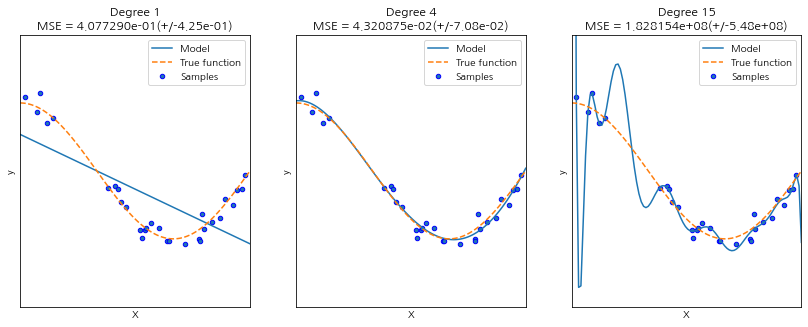

In [56]:
# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    
    # Pipieline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
           
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()
          

### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

In [ ]:
# L1 라쏘 - 맨하튼 거리(삼각형의 가로세로), 회귀계수를 0으로 변환
# L2 릿지 - 유클리드 거리(삼각형의 대각선), 회귀계수 감소시켜줌

#### 릿지 회귀

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [65]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100, 1000]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5폴드의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {} 일 때 5 folds의 평균 RMSE : {:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330
alpha 1000 일 때 5 folds의 평균 RMSE : 5.598


In [62]:
# alpha 값 변화에 따른 피처의 회귀 계수 값 시각화

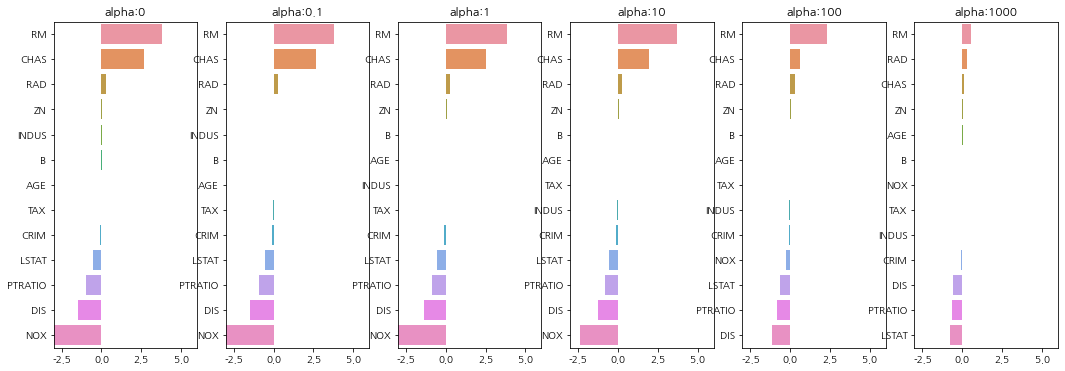

In [66]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장
# pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환, DataFrame 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 aplha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 정렬
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for문 바깥에 맷플롯립 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()


In [68]:
ridge_alphas = [0, 0.1, 1, 10, 100, 1000]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:1000
RM,3.809865,3.818233,3.854000,3.702272,2.334536,0.568555
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335,0.101449
RAD,0.306049,0.303515,0.290142,0.279596,0.315358,0.310743
ZN,0.046420,0.046572,0.047443,0.049579,0.054496,0.054378
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826,-0.036336
B,0.009312,0.009368,0.009673,0.010037,0.009393,0.007990
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212,0.030573
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856,-0.016602
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202,-0.090768
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764,-0.763721


### 라쏘 회귀

In [87]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params, X, y, verbose=True):
    coff_df = pd.DataFrame()
    if verbose : print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha:{}, 평균 rmse:{:.3f}'.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습해 회귀 계수 추출
        
        model.fit(X, y)
        coeff = pd.Series(data=model.coef_) # index=X.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [88]:
lasso_alphas = [0.01, 0.03, 0.07, 0.1, 0.5, 1.3]
get_linear_reg_eval('Lasso', lasso_alphas, X_data, y_target)

######  Lasso ######
alpha:0.01, 평균 rmse:5.740
alpha:0.03, 평균 rmse:5.644
alpha:0.07, 평균 rmse:5.612
alpha:0.1, 평균 rmse:5.615
alpha:0.5, 평균 rmse:5.669
alpha:1.3, 평균 rmse:5.845


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:1000,alpha:0.07,alpha:0.5,alpha:1.3,alpha:0.01,alpha:0.03,alpha:3
CRIM,-0.108011,NaN,-0.104595,-0.101435,-0.102202,-0.090768,NaN,NaN,NaN,NaN,NaN,-0.019058
ZN,0.046420,NaN,0.047443,0.049579,0.054496,0.054378,NaN,NaN,NaN,NaN,NaN,0.038268
INDUS,0.020559,NaN,-0.008805,-0.042962,-0.052826,-0.036336,NaN,NaN,NaN,NaN,NaN,-0.000000
CHAS,2.686734,NaN,2.552393,1.952021,0.638335,0.101449,NaN,NaN,NaN,NaN,NaN,0.000000
NOX,-17.766611,NaN,-10.777015,-2.371619,-0.262847,-0.016001,NaN,NaN,NaN,NaN,NaN,-0.000000
RM,3.809865,NaN,3.854000,3.702272,2.334536,0.568555,NaN,NaN,NaN,NaN,NaN,0.000000
AGE,0.000692,NaN,-0.005415,-0.010707,0.001212,0.030573,NaN,NaN,NaN,NaN,NaN,0.043446
DIS,-1.475567,NaN,-1.372654,-1.248808,-1.153390,-0.612628,NaN,NaN,NaN,NaN,NaN,-0.031208
RAD,0.306049,NaN,0.290142,0.279596,0.315358,0.310743,NaN,NaN,NaN,NaN,NaN,0.146846
TAX,-0.012335,NaN,-0.012912,-0.013993,-0.015856,-0.016602,NaN,NaN,NaN,NaN,NaN,-0.011417


### 엘라스틱텟 회귀

In [89]:
# l1_ratio 파라미터 값음 a / (a+b)이다
# l1_ratio가 0이면 a가 0이므로 L2 규제와 동일
# l1_ratio가 1이면 b가 0이므로 L1 규제와 동일

In [90]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
get_linear_reg_eval('ElasticNet', elastic_alphas, X_data, y_target)

######  ElasticNet ######
alpha:0.07, 평균 rmse:5.542
alpha:0.1, 평균 rmse:5.526
alpha:0.5, 평균 rmse:5.467
alpha:1, 평균 rmse:5.597
alpha:3, 평균 rmse:6.068


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:1000,alpha:0.07,alpha:0.5,alpha:1.3,alpha:0.01,alpha:0.03,alpha:3
CRIM,-0.108011,NaN,NaN,-0.101435,-0.102202,-0.090768,NaN,NaN,NaN,NaN,NaN,NaN
ZN,0.046420,NaN,NaN,0.049579,0.054496,0.054378,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,0.020559,NaN,NaN,-0.042962,-0.052826,-0.036336,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,2.686734,NaN,NaN,1.952021,0.638335,0.101449,NaN,NaN,NaN,NaN,NaN,NaN
NOX,-17.766611,NaN,NaN,-2.371619,-0.262847,-0.016001,NaN,NaN,NaN,NaN,NaN,NaN
RM,3.809865,NaN,NaN,3.702272,2.334536,0.568555,NaN,NaN,NaN,NaN,NaN,NaN
AGE,0.000692,NaN,NaN,-0.010707,0.001212,0.030573,NaN,NaN,NaN,NaN,NaN,NaN
DIS,-1.475567,NaN,NaN,-1.248808,-1.153390,-0.612628,NaN,NaN,NaN,NaN,NaN,NaN
RAD,0.306049,NaN,NaN,0.279596,0.315358,0.310743,NaN,NaN,NaN,NaN,NaN,NaN
TAX,-0.012335,NaN,NaN,-0.013993,-0.015856,-0.016602,NaN,NaN,NaN,NaN,NaN,NaN


#### 표준 정규 분포 변화, 최대/최소값 정규화, 로그 변환 적용 후 각 RMSE 예측 성능 측정

In [91]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log)결정
# p_degree는 다항식 특성을 추가할 때 적용, ㅔ_degree는 2 이상 부여하지 않음

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환, 먼저 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2),('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(scale_method[0], scale_method[1], X_data)
    print('\n## 변환 유형:{}, Polynomial Degree:{}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', alphas, X_data_scaled, y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha:0.1, 평균 rmse:5.788
alpha:1, 평균 rmse:5.653
alpha:10, 평균 rmse:5.518
alpha:100, 평균 rmse:5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha:0.1, 평균 rmse:5.826
alpha:1, 평균 rmse:5.803
alpha:10, 평균 rmse:5.637
alpha:100, 평균 rmse:5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha:0.1, 평균 rmse:8.827
alpha:1, 평균 rmse:6.871
alpha:10, 평균 rmse:5.485
alpha:100, 평균 rmse:4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha:0.1, 평균 rmse:5.764
alpha:1, 평균 rmse:5.465
alpha:10, 평균 rmse:5.754
alpha:100, 평균 rmse:7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha:0.1, 평균 rmse:5.298
alpha:1, 평균 rmse:4.323
alpha:10, 평균 rmse:5.185
alpha:100, 평균 rmse:6.538

## 변환 유형:Log, Polynomial Degree:None
alpha:0.1, 평균 rmse:4.770
alpha:1, 평균 rmse:4.676
alpha:10, 평균 rmse:4.836
alpha:100, 평균 rmse:6.241


### 로지스틱 회귀

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [100]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [101]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [102]:
# StandardScaler로 평균이 0, 분산 1로 데이터 분포도 반환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [104]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
accuracy_score(y_test, lr_preds)

0.9766081871345029

In [105]:
roc_auc_score(y_test, lr_preds)

0.9715608465608465

In [108]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

params = {
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 1, 5, 10]
}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{}, 최적 평균 정확도:{:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975
